In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def real_func(x):
    return np.sin(1.5 * np.pi + x)

In [3]:
# 設定 Hyperparameters
lr = 0.01
epochs = 10000
n_samples = 30

# 製造資料 x, y
np.random.seed(0)
x = np.random.rand(n_samples)
y = real_func(x) + np.random.rand(n_samples) * 0.1
n = len(x)

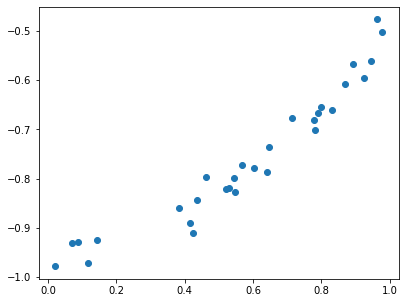

In [4]:
# 查看資料分布
plt.figure(figsize=(10, 5))
plt.subplots_adjust(left=0.3, right=0.8)
plt.scatter(x, y)
plt.savefig('original.png')
plt.show()

In [5]:
# 定義 Loss (MSE)
Losses = []
def Loss(y, y_pred):
    return np.sum((y - y_pred) ** 2) / (2 * n)

In [6]:
# 要測試的 degree
degrees = [1, 4, 30]

In [7]:
# 存放結果
!mkdir -p res
!mkdir -p res/1
!mkdir -p res/4
!mkdir -p res/30

In [8]:
res = [] # 存放每個模型最後的 theta
cnt = 0  # 現在在處理第幾個 degree
for degree in degrees:
    id = 0 # 儲存的結果圖片流水號
    Losses.append([])
    theta = np.ones((degree + 1, 1))
    # 開始訓練
    for epoch in range(epochs):
        y_pred = np.zeros(x.shape)
        for i in range(degree + 1):
            y_pred = y_pred + theta[i] * x**i
        loss = Loss(y, y_pred)
        Losses[cnt].append(loss)
        for i in range(degree + 1):
            theta[i] = theta[i] - lr * np.dot((x**i).T, (y_pred - y) / n)
        
        # 每 100 個 epoch 存一次當前結果
        if epoch % 100 == 0:
            plt.figure(figsize=(10, 5))
            plt.subplots_adjust(left=0.3, right=0.8)
            plt.figure().patch.set_facecolor('white')
            plt.scatter(x, y)
            MIN_x, MAX_x = np.min(x), np.max(x)
            plot_x = np.linspace(MIN_x, MAX_x)
            plot_y = np.zeros(plot_x.shape)
            for i in range(degree + 1):
                plot_y = plot_y + theta[i] * plot_x**i
            plt.plot(plot_x, plot_y)
            plt.savefig(f'res/{degree}/{id}.png', transparent=False)
            plt.cla()
            plt.close("all")
            id += 1     
    cnt += 1
    res.append(theta)

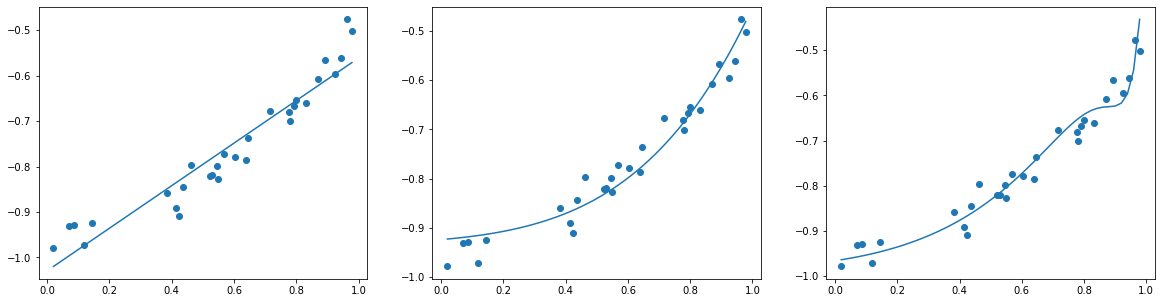

In [9]:
# 繪製三個模型結果圖
MIN_x, MAX_x = np.min(x), np.max(x)
figure, axis = plt.subplots(1, 3)
figure.set_figheight(5)
figure.set_figwidth(20)
cnt = 0
for degree in degrees:
    sub_fig = axis[cnt]
    sub_fig.scatter(x, y)
    plot_x = np.linspace(MIN_x, MAX_x)
    plot_y = np.zeros(plot_x.shape)
    for i in range(degree + 1):
        plot_y = plot_y + res[cnt][i] * plot_x**i
    sub_fig.plot(plot_x, plot_y)
    sub_fig.plot()
    cnt += 1
plt.savefig('overfitting.png')
plt.show()

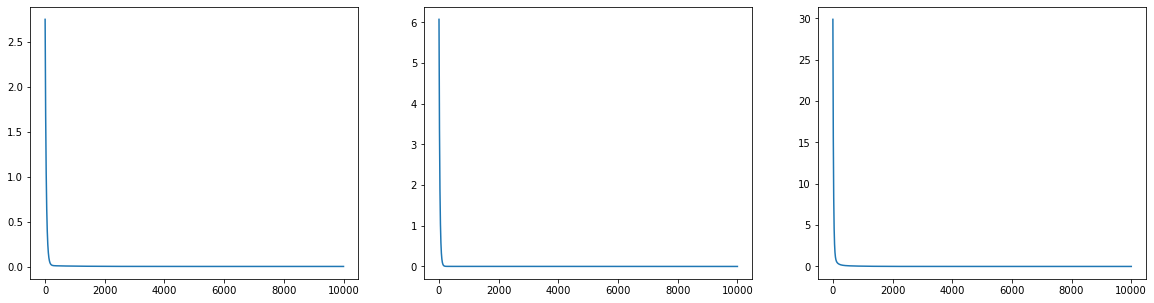

In [10]:
# 繪製三個模型 Loss Function
figure, axis = plt.subplots(1, 3)
figure.set_figheight(5)
figure.set_figwidth(20)
cnt = 0
for degree in degrees:
    sub_fig = axis[cnt]
    sub_fig.plot([i for i in range(epochs)], Losses[cnt])
    sub_fig.plot()
    cnt += 1
plt.savefig('overall_loss.png')
plt.show()

In [11]:
# 把圖片變成 gif
!ffmpeg -i res/1/%d.png res/1_output.gif -y -filter_complex "split[s0][s1]; [s0]palettegen= stats_mode=single: transparency_color=000000[p]; [s1][p]paletteuse= new=1: alpha_threshold=10"
!ffmpeg -i res/4/%d.png res/4_output.gif -y -filter_complex "split[s0][s1]; [s0]palettegen= stats_mode=single: transparency_color=000000[p]; [s1][p]paletteuse= new=1: alpha_threshold=10"
!ffmpeg -i res/30/%d.png res/30_output.gif -y -filter_complex "split[s0][s1]; [s0]palettegen= stats_mode=single: transparency_color=000000[p]; [s1][p]paletteuse= new=1: alpha_threshold=10"

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

[Parsed_palettegen_1 @ 0x55fe17095a80] 255(+1) colors generated out of 318 colors; ratio=0.801887
[Parsed_palettegen_1 @ 0x55fe17095a80] Dupped color: FFACCCE3
[Parsed_palettegen_1 @ 0x55fe17095a80] 255(+1) colors generated out of 435 colors; ratio=0.586207
[Parsed_palettegen_1 @ 0x55fe17095a80] 255(+1) colors generated out of 427 colors; ratio=0.597190
    Last message repeated 1 times
[Parsed_palettegen_1 @ 0x55fe17095a80] 255(+1) colors generated out of 437 colors; ratio=0.583524
[Parsed_palettegen_1 @ 0x55fe17095a80] Dupped color: FFF0F6FA
[Parsed_palettegen_1 @ 0x55fe17095a80] 255(+1) colors generated out of 438 colors; ratio=0.582192
[Parsed_palettegen_1 @ 0x55fe17095a80] Dupped color: FF3584BB
[Parsed_palettegen_1 @ 0x55fe17095a80] 255(+1) colors generated out of 438 colors; ratio=0.582192
[Parsed_palettegen_1 @ 0x55fe17095a80] Dupped color: FFF4F8FB
[Parsed_palettegen_1 @ 0x55fe17095a80] 255(+1) colors generated out of 433 colors; ratio=0.588915
[Parsed_palettegen_1 @ 0x55fe170

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

[Parsed_palettegen_1 @ 0x55893b565900] 255(+1) colors generated out of 433 colors; ratio=0.588915
[Parsed_palettegen_1 @ 0x55893b565900] Dupped color: FF478FC1
[Parsed_palettegen_1 @ 0x55893b565900] 255(+1) colors generated out of 435 colors; ratio=0.586207
[Parsed_palettegen_1 @ 0x55893b565900] 255(+1) colors generated out of 426 colors; ratio=0.598592
[Parsed_palettegen_1 @ 0x55893b565900] 255(+1) colors generated out of 428 colors; ratio=0.595794
[Parsed_palettegen_1 @ 0x55893b565900] 255(+1) colors generated out of 431 colors; ratio=0.591647
[Parsed_palettegen_1 @ 0x55893b565900] Dupped color: FF5497C5
[Parsed_palettegen_1 @ 0x55893b565900] 255(+1) colors generated out of 429 colors; ratio=0.594406
[Parsed_palettegen_1 @ 0x55893b565900] 255(+1) colors generated out of 438 colors; ratio=0.582192
[Parsed_palettegen_1 @ 0x55893b565900] 255(+1) colors generated out of 431 colors; ratio=0.591647
[Parsed_palettegen_1 @ 0x55893b565900] 255(+1) colors generated out of 430 colors; ratio=0.5

[Parsed_palettegen_1 @ 0x55893b565900] 255(+1) colors generated out of 424 colors; ratio=0.601415
frame=  100 fps=0.0 q=-0.0 Lsize=     510kB time=00:00:03.97 bitrate=1052.6kbits/s speed=   9x    
video:510kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.003829%
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enabl

    Last message repeated 1 times
[Parsed_palettegen_1 @ 0x56539fcfa840] 255(+1) colors generated out of 445 colors; ratio=0.573034
[Parsed_palettegen_1 @ 0x56539fcfa840] Dupped color: FFF4F8FB
[Parsed_palettegen_1 @ 0x56539fcfa840] Dupped color: FFF7FAFC
[Parsed_palettegen_1 @ 0x56539fcfa840] 255(+1) colors generated out of 434 colors; ratio=0.587558
[Parsed_palettegen_1 @ 0x56539fcfa840] 255(+1) colors generated out of 447 colors; ratio=0.570470
[Parsed_palettegen_1 @ 0x56539fcfa840] Dupped color: FFF2F7FA
[Parsed_palettegen_1 @ 0x56539fcfa840] 255(+1) colors generated out of 446 colors; ratio=0.571749
[Parsed_palettegen_1 @ 0x56539fcfa840] Dupped color: FF3E8ABE
[Parsed_palettegen_1 @ 0x56539fcfa840] 255(+1) colors generated out of 449 colors; ratio=0.567929
[Parsed_palettegen_1 @ 0x56539fcfa840] 255(+1) colors generated out of 443 colors; ratio=0.575621
    Last message repeated 1 times
[Parsed_palettegen_1 @ 0x56539fcfa840] 255(+1) colors generated out of 444 colors; ratio=0.57432

[Parsed_palettegen_1 @ 0x56539fcfa840] 255(+1) colors generated out of 436 colors; ratio=0.584862
[Parsed_palettegen_1 @ 0x56539fcfa840] 255(+1) colors generated out of 432 colors; ratio=0.590278
[Parsed_palettegen_1 @ 0x56539fcfa840] Dupped color: FF428CBF
[Parsed_palettegen_1 @ 0x56539fcfa840] 255(+1) colors generated out of 428 colors; ratio=0.595794
[Parsed_palettegen_1 @ 0x56539fcfa840] 255(+1) colors generated out of 440 colors; ratio=0.579545
[Parsed_palettegen_1 @ 0x56539fcfa840] Dupped color: FFADCDE3
[Parsed_palettegen_1 @ 0x56539fcfa840] 255(+1) colors generated out of 434 colors; ratio=0.587558
[Parsed_palettegen_1 @ 0x56539fcfa840] 255(+1) colors generated out of 435 colors; ratio=0.586207
[Parsed_palettegen_1 @ 0x56539fcfa840] 255(+1) colors generated out of 439 colors; ratio=0.580866
[Parsed_palettegen_1 @ 0x56539fcfa840] Dupped color: FF428CBF
[Parsed_palettegen_1 @ 0x56539fcfa840] 255(+1) colors generated out of 432 colors; ratio=0.590278
[Parsed_palettegen_1 @ 0x56539

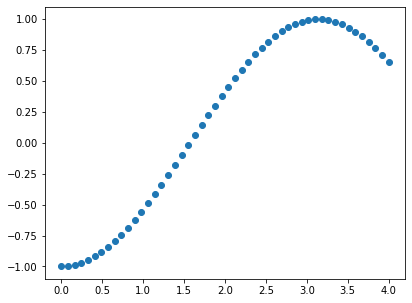

In [12]:
# 真實資料進來了，驗證模型泛化能力
X = np.linspace(0, 4)
Y = real_func(X)
plt.figure(figsize=(10, 5))
plt.subplots_adjust(left=0.3, right=0.8)
plt.scatter(X, Y)
plt.savefig('real_loss.png')
plt.show()

In [13]:
cnt = 0
for degree in degrees:
    y_pred = np.zeros(X.shape)
    for i in range(degree + 1):
        y_pred = y_pred + res[cnt][i] * X**i
    loss = Loss(Y, y_pred)
    print(f'degree {degree}\tloss: {loss}')
    cnt += 1

degree 1	loss: 0.12824792221185963
degree 4	loss: 262.9516729395171
degree 30	loss: 1.6317728996135443e+33
